In [15]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [16]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [17]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [18]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [19]:
# reflect an existing database into a new model 
automap_df = automap_base()
# reflect the tables
automap_df.prepare(engine, reflect=True)

In [20]:
# View all of the classes that automap found
automap_df.classes.keys()

['measurement', 'station']

In [21]:
# Save references to each table
measurement = automap_df.classes.measurement
station = automap_df.classes.station

In [22]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [23]:
# Find the most recent date in the data set.
engine.execute('SELECT max(date) FROM measurement').fetchall()


[('2017-08-23',)]

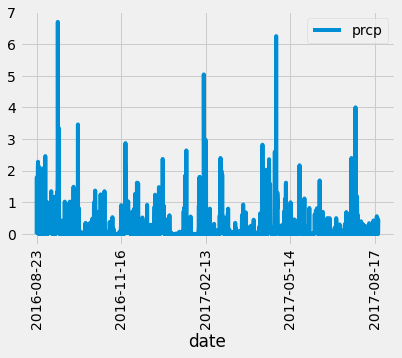

In [26]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(measurement.date, measurement.prcp).filter(measurement.date >= "2016-08-23").\
    filter(measurement.date <= "2017-08-23").all()
# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(precipitation).set_index('date')

# Sort the dataframe by date
precip_df=precip_df.sort_values(by='date').dropna()
precip_df.head()

# Use Pandas Plotting with Matplotlib to plot the data

precip_df.plot(rot=90)
plt.savefig("Precipitation_analysis.png")
plt.show()


In [27]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [29]:
# Design a query to calculate the total number stations in the dataset
number_of_stations = session.query(station.id).count()
print(f'There are {number_of_stations} stations.')

There are 9 stations.


In [30]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
activity = session.query(measurement.station, func.count(measurement.station)).\
group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [31]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_number = 'USC00519281'
session.query(func.min(measurement.tobs),
              func.max(measurement.tobs),
              func.avg(measurement.tobs)).filter(measurement.station == station_number).all()

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 0, 'Temperature')

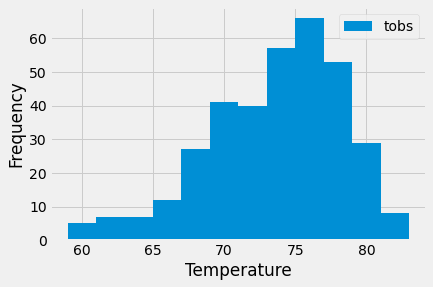

In [37]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_highest_obs = activity[0][0]

year_temp = session.query(measurement.date, measurement.tobs).\
    filter(measurement.date >= "2016-08-23").\
    filter(measurement.date <= "2017-08-23").\
    filter(measurement.station == station_highest_obs).all()
year_temp_df = pd.DataFrame(year_temp)
year_temp_df.plot.hist(bins=12).set_xlabel("Temperature")

# Close session

In [38]:
# Close Session
session.close()